# Exploratory Data Analysis (EDA) for Natural Language Processing using WordCloud

## What is WordCloud?        
   
<img src="https://altoona.psu.edu/sites/default/files/styles/photo_gallery_large/http/news.psu.edu/sites/default/files/success-word-cloud.jpg?itok=4_HTmhRg+" alt="Drawing" style="width: 600;"/>

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called [Tag Cloud](https://en.wikipedia.org/wiki/Tag_cloud) or WordCloud. For this tutorial, you will learn how to create a WordCloud of your own in Python and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively. 

In this tutorial we will use a wine review dataset taking from [Wine Enthusiast website](https://www.winemag.com/?s=&drink_type=wine) to learn:
- How to create a basic wordcloud from one to several text document
- Adjust color, size and number of text inside your wordcloud
- Mask your wordcloud into any shape of your choice
- Mask your wordcloud into any color pattern of your choice

![](img/Oh-look-its-wine-o-clock.jpg)

### Prerequisites
You will need to install some packages below:
- [numpy](http://www.numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/index.html)
- [pillow](https://pillow.readthedocs.io/en/5.1.x/) 
- [wordcloud](https://github.com/amueller/word_cloud)

The `numpy` library is one of the most popular and helpful library that is used for handling multi-dimensional arrays and matrices. It is also used in combination with `Pandas` library to perform data analysis. 

The Python `os` module is a built-in library so you don't have to install it. To read more about handling files with os module, [this DataCamp tutorial](https://www.datacamp.com/community/tutorials/reading-writing-files-python#os) will be helpful.

For visualization, `matplotlib` is a basic library that enable many other libraries to run and plot on its base including [`seaborn`](https://seaborn.pydata.org/) or `wordcloud` that you will use in this tutorial. The `pillow` library is a package that enable image reading. Its tutorial can be found [here](https://pillow.readthedocs.io/en/5.1.x/handbook/tutorial.html). Pillow is a wrapper for PIL - Python Imaging Library. You will need this library to read in image as the mask for the wordcloud. 

`wordcloud` can be a little tricky to install. If you only need it for plotting a basic wordcloud, then `pip install wordcloud` or `conda install -c conda-forge wordcloud` would be sufficient. However, the latest version with the ability to mask the cloud into any shape of your choice requires a different method of installation as below:

```
git clone https://github.com/amueller/word_cloud.git
cd word_cloud
pip install .
```

### Dataset:   
This tutorial uses the [wine review dataset](https://www.kaggle.com/zynicide/wine-reviews/data) from [Kaggle](https://www.kaggle.com). This collection is a great dataset for learning with no missing values (which will take time to handle) and a lot of text (wine reviews), categorical, and numerical data.

### Now let's get started!
First thing first, you load all the necessary libraries:

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

If you have more than 10 libraries, organize them by sections (such as basic libs, visualization, models, etc.) using comment in code will make your code clean and easy to follow.      
Now, using pandas `read_csv` to load in the dataframe. Notice the use of `index_col=0` meaning we don't read in row name (index) as a separated column.

In [2]:
# Load in the dataframe
df = pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)

In [3]:
# Looking at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


You can print out some basic information about the dataset using `print()` combined with `.format()` to have a nice print out.

In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()), 
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()), 
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [5]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


To make comparisons between groups of a feature, you can use `groupby()` and compute summary statistics. 

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [4]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

This selects the top 5 highest average points among all 44 countries:

In [7]:
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


You can plot the number of wines by country using the plot method of Pandas DataFrame and Matplotlib. If you are not familiar with Matplotlib, I suggested to take a quick look at [this tutorial](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python). 

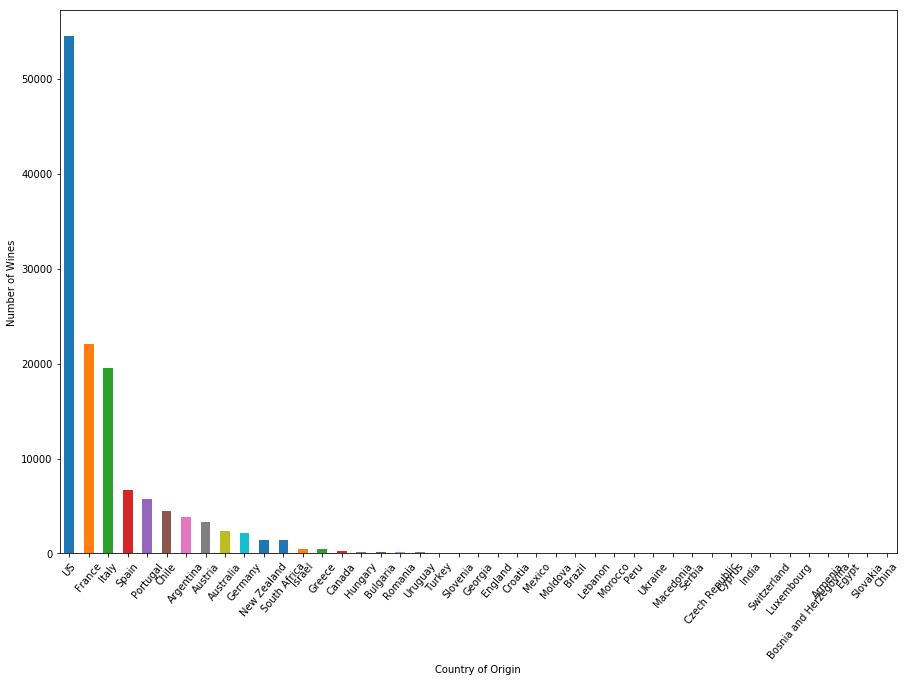

In [8]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

Among 44 countries producing wine, US has more than 50,000 types of wine in the wine review dataset, twice as much as the next one in the rank: France - the country famous for its wine. Italy also produces a lot of quality wine, having nearly 20,000 wines open to review.       
##### Does quantity over quality?
Let's now take a look at the plot of all 44 countries by its highest rated wine, using the same plotting technique as above:          

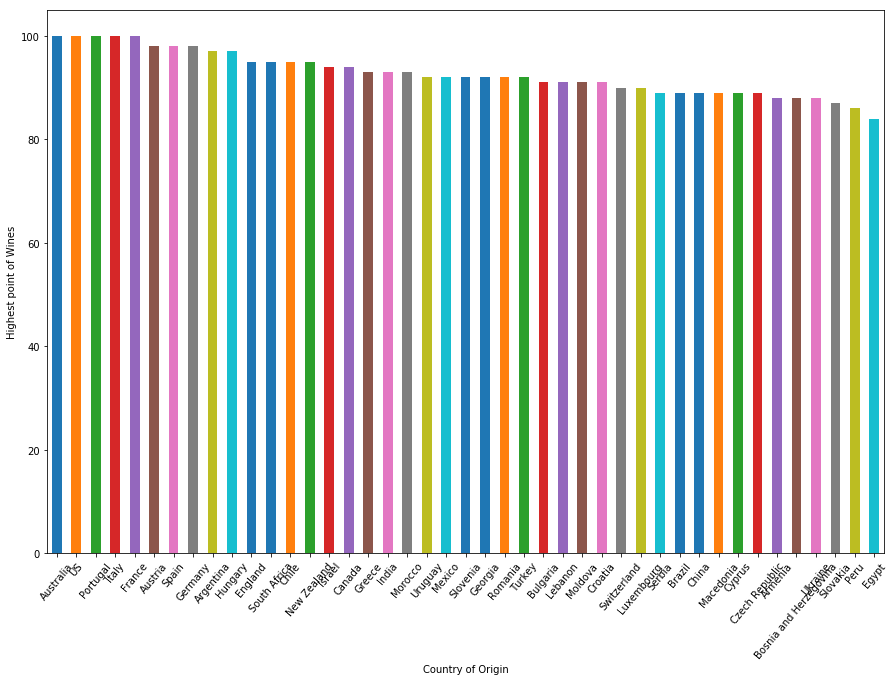

In [28]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Australia, US, Portugal, Italy and France all have 100 points wine. If you notice, Portugal ranks 5th and Australia rankes 9th in the number of wines produces in the dataset, and both countries have less than 8000 types of wine.       
That's a little bit of data exploration to get to know the dataset that you are using today. Now you will start dive into the main course of the meal: **WordCloud**.

### Set up a basic WordCloud
[WordCloud](https://amueller.github.io/word_cloud/index.html) is a technique to show which words are the most frequent among the given text. The first thing you may want to do before using any functions is check out the docstring of the function, and see all required and optional arguments. To do so, type `?function` and run it to get all information.

In [9]:
?WordCloud

Init signature: WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0.5, regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black')
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try ro

You can see that the only required argument for a WordCloud object is the **text**, while all others are optional.

So let's start with a simple example: using the first observation description as the input for the wordcloud. The three steps are:
- Extract the review (text document)
- Create and generate a wordcloud image
- Display the cloud using matplotlib

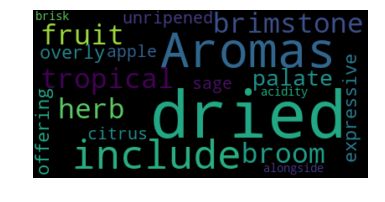

In [10]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Great! You can see that the first review mentioned a lot about dried flavours, and the aromas of the wine. 

Now, change some optional arguments of the WordCloud like `max_font_size`, `max_word` and `background_color`.

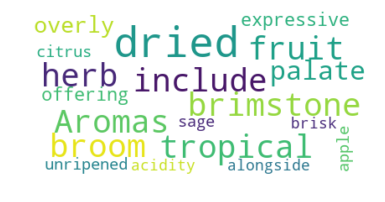

In [11]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Ugh, seems like `max_font_size` here might not be a good idea. It makes it more difficult to see the differences between word frequencies. However, brightening the background makes the cloud easier to read. 

If you want to save the image, WordCloud provides a function `to_file`

In [12]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

The result will look like this when you load them in:        
![](img/first_review.png)

You've probably noticed the argument `interpolation="bilinear"` in the `plt.imshow()`. This is to make the displayed image appear more smoothly. For more information about the choice, [here](https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html) is a helpful link to explore more about this choice.   

So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [32]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


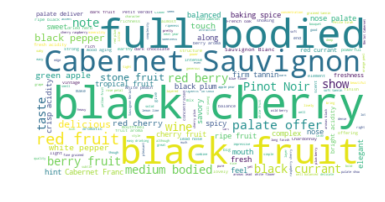

In [33]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like black cherry and full-bodied are the most mentioned characteristics and Cabernet Sauvignon is the most popular of them all. This aligns with the fact that Cabernet Sauvignon "is one of the world's most widely recognized red wine grape varieties. It is grown in nearly every major wine producing country among a diverse spectrum of climates from Canada's Okanagan Valley to Lebanon's Beqaa Valley".<sup>[[1]](https://en.wikipedia.org/wiki/Cabernet_Sauvignon)</sup>
                       
Now, let's pour these words into a cup of wine!         
Seriously,           
Even a bottle of wine if you wish!       
       
In order to create a shape for your wordcloud, first you need to find a PNG file to become the mask. Below is a nice one that is available on the internet:      
![](img/wine_mask.png)

Not all mask images have the same format resulting in different outcomes, hence making the WordCloud function not working properly. To make sure that your mask works, let's take a look at it in the numpy array form:

In [34]:
wine_mask = np.array(Image.open("img/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.       

First, you use the `transform_format()` function to swap number 0 to 255.

In [35]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function `transform_format()` to each value in each row of the previous mask. 

In [36]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

Now, you have a new mask in the correct form. Print out the transformed mask is the best way to check if the function works fine.    

In [37]:
# Check the expected result of your mask
transformed_wine_mask 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

Okay! With the right mask, you can start making the wordcloud with your selected shape. Notice in the `WordCloud` function, there is a `mask` argument that take in the transformed mask that you created above. The `contour_width` and `contour_color` are, as their name, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a redwine bottle, so firebrick seems like a good choice for contour color. For more choice of color, you can take a look at this [color code table](https://matplotlib.org/2.0.0/examples/color/named_colors.html)

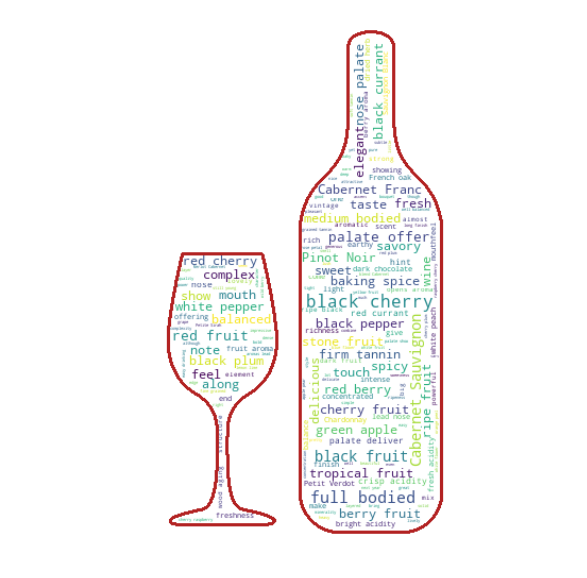

In [43]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask, 
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Voila! You created a wordcloud in the shape of a wine bottle! It seems like wine descriptions most often mention about black cherry, fruit flavours and full bodied characteristics of the wine. Now let's take a closer look at the reviews for each country and plot the wordcloud using each country flag. For you easy to imagine, this is an example that you will create soon:                   
<img src="img/us_wine.png" alt="Drawing" style="width: 650px;"/>     

### Creating wordcloud following a color pattern

You can combine all the reviews of five countries that have the most wines. To find those countries, you can either look at the plot *country vs number* of wine above or use the group that you got above to find the number of observations for each country (each group) and `sort_values()` with argument `ascending=False` to sort descending.

In [20]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

So now you have 5 top countries: US, France, Italy, Spain and Portugal. You can change the number of countries by putting your choice number insider `head()` like below

In [21]:
country.size().sort_values(ascending=False).head(10)

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
dtype: int64

For now, 5 countries should be enough.

To get all review for each country, you can concatenate all of the reviews using the `" ".join(list)` syntax, which joins all elements in a list separating them by whitespace.

In [ ]:
# Join all reviews of each country:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)

Then, creating the wordcloud as above. You can combine the two steps of creating and generate into one as below. The color mapping is done right before you plot the cloud using the [ImageColorGenerator](https://amueller.github.io/word_cloud/generated/wordcloud.ImageColorGenerator.html) function from WordCloud library. 

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/us.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(usa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_wine.png", format="png")

plt.show()

Looks good! Now let's repeat with review from France.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/france.png"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(fra)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/fra_wine.png", format="png")

#plt.show()

Please note that you should save the image after plotting to have the wordcloud with desired color pattern.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/italy.png"))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(ita)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/ita_wine.png", format="png")

#plt.show()

Following Italy is Spain:

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/spain.png"))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(spa)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/spa_wine.png", format="png")
#plt.show()

Lastly, Portugal:

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("img/portugal.png"))
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask).generate(por)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/por_wine.png", format="png")
#plt.show()

The end result are in the below table to compare between the mask and the wordcloud. Which one is your favorite?

|Mask|Result|
|:--:| :--: |
|<img src="img/us.png" alt="Drawing" style="width: 500px;"/>|<img src="img/us_wine.png" alt="Drawing" style="width: 650px;"/>|
|<img src="img/france.png" alt="Drawing" style="width: 500px;"/>|<img src="img/fra_wine.png" alt="Drawing" style="width: 650px;"/>|
|<img src="img/italy.png" alt="Drawing" style="width: 500px;"/>|<img src="img/ita_wine.png" alt="Drawing" style="width: 650px;"/>|
|<img src="img/spain.png" alt="Drawing" style="width: 500px;"/>|<img src="img/spa_wine.png" alt="Drawing" style="width: 650px;"/>|
|<img src="img/portugal.png" alt="Drawing" style="width: 500px;"/>|<img src="img/por_wine.png" alt="Drawing" style="width: 650px;"/>|

## Congratulations! 

You made it! You have learned several ways to draw a WordCloud that would be helpful for visualization any text analysis. You also learn how to mask the cloud into any shape, using any color of your choice. If you want to practice your skills, consider the DataCamp's project: [The Hottest Topics in Machine Learning](https://www.datacamp.com/projects/158)

If you'd like to get in touch with me, you can drop me an e-mail at dqvu.ubc@gmail.com or connect with me via [LinkedIn](https://www.linkedin.com/in/duongqvu/).